### convert molecules to smiles csv

In [3]:
%run sdf2smileCSV.py ~/VinaScreen/ligand bestLigs.csv

In [12]:
%run pdbqt2smiles.py /home/nikka/VinaScreen/ligand/ bestLigs.csv

Processed 41 molecules from 41 PDBQT files. Output written to bestLigs.csv


### Add InChiKey

In [13]:
import pandas as pd
from rdkit import Chem

# Load the CSV file
input_csv = 'top10_ligSMILE.csv'         # <- change this to your file path
output_csv = 'top10_ligADME.csv'       # <- desired output path

df = pd.read_csv(input_csv)

# Function to calculate InChIKey from SMILES
def smiles_to_inchikey(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToInchiKey(mol)
        else:
            return ''
    except Exception:
        return ''

# Apply to every row in SMILES column
df['InChIKey'] = df['SMILES'].apply(smiles_to_inchikey)

# Save the new CSV
df.to_csv(output_csv, index=False)
print(f'Saved output to: {output_csv}')


Saved output to: top10_ligADME.csv


### Merge two  csv based on InChiKey

In [16]:
import pandas as pd

# Set your file paths
file1 = 'bestLigs.csv'
file2 = 'top10_ligADME.csv'
output = 'bestLigs_ADME.csv'

# Read the CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print(df1['InChIKey'].value_counts())
print(df2['InChIKey'].value_counts())

df1 = df1.drop_duplicates('InChIKey')
df2 = df2.drop_duplicates('InChIKey')

# Perform merge ON 'InChIKey', keep all columns with suffixes for duplicates
merged = pd.merge(df1, df2, on='InChIKey', how='outer', suffixes=('_1', '_2'))

# Save output
merged.to_csv(output, index=False)
print(f'Merged file saved as {output}')


InChIKey
CFBQAWKMMWAVEZ-UHFFFAOYSA-N    3
DRMSRUMYXFBPBX-UHFFFAOYSA-N    2
JNZLTZBKNAVHSR-UHFFFAOYSA-N    2
ZOCGFVXIGNUUFB-UHFFFAOYSA-N    1
VSHVMYMVBUDHBN-UHFFFAOYSA-N    1
XJARMDUBMFYJOD-UMSFTDKQSA-N    1
GSSVCQKYNMBSNG-UHFFFAOYSA-N    1
ZYSYPQYLBANUGJ-SSEXGKCCSA-N    1
IJXVGKYOAWSNOY-UHFFFAOYSA-N    1
RZTNEFBNXQTPDG-DHUJRADRSA-N    1
QTZXJHMFMXCZKJ-UHFFFAOYSA-N    1
OHPWJDFPEFHRGW-UHFFFAOYSA-N    1
LLXXJGWCFYZDFT-UHFFFAOYSA-N    1
QEZHAWGTKPYASG-UHFFFAOYSA-N    1
YUACJICQTLKFQH-UHFFFAOYSA-N    1
LKBLMXLZEOMOSE-UHFFFAOYSA-N    1
JBFZDBNQTQTCOM-UHFFFAOYSA-N    1
YOPZACPAACZTMK-UHFFFAOYSA-N    1
LDFVBKRYVHJIEF-UHFFFAOYSA-N    1
IDKFFZHGVGVWSN-UUWRZZSWSA-N    1
ORZYWGQYTPNYJC-UHFFFAOYSA-N    1
ZQHCGOXPBYIJBP-UHFFFAOYSA-N    1
VTUJHIZBAJTKHO-UHFFFAOYSA-N    1
KRCNJENCAKNFCO-UHFFFAOYSA-N    1
RRYPIOXQOJICSJ-MHZLTWQESA-N    1
BAHXFRMGTSKTES-LJAQVGFWSA-N    1
YJIQXNJBGUUMKK-SLGZMBILSA-N    1
BSIUPYHFBYTLDS-UHFFFAOYSA-N    1
UOSOHAVPMMQOCT-UHFFFAOYSA-N    1
DHCAGCFZDJBNPF-UHFFFAOYSA-N    1
F

### create a 3D plot of specified values

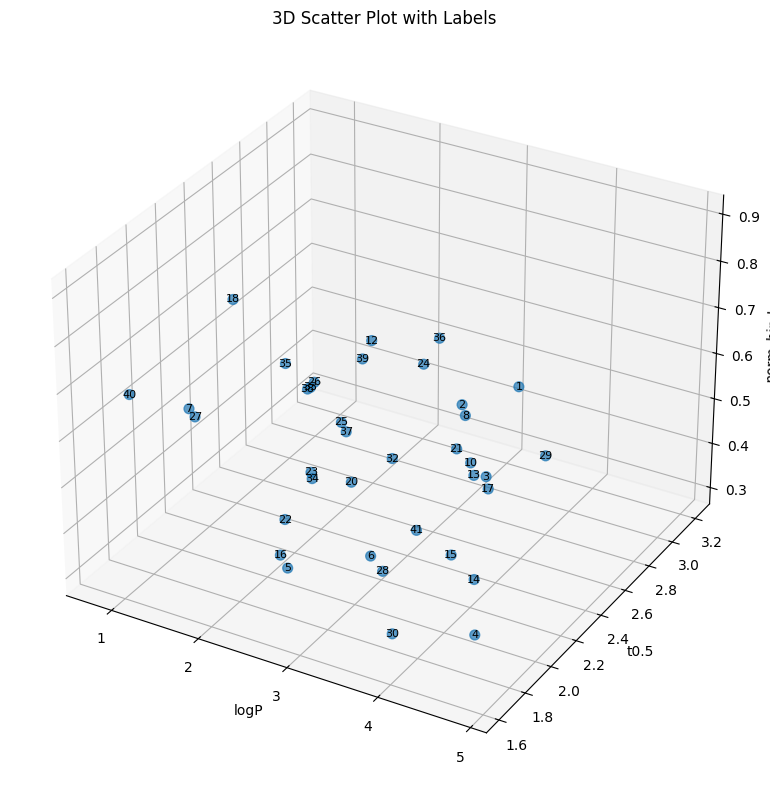

Plot saved png image (300 dpi)


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set your file and column names
csv_file = 'bestLigs_ADME.csv'
x_column = 'logP'   # Replace with actual column names
y_column = 't0.5'
z_column = 'norm_bind'
id_column = 'pool_ID'       # Replace with your ID column

df = pd.read_csv(csv_file)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df[x_column], df[y_column], df[z_column], s=50, alpha=0.7)

ax.set_xlabel(x_column)
ax.set_ylabel(y_column)
ax.set_zlabel(z_column)
plt.title('3D Scatter Plot with Labels')

# Add labels for each point
for i, label in enumerate(df[id_column]):
    ax.text(df[x_column].iat[i], df[y_column].iat[i], df[z_column].iat[i], str(label), fontsize=8, ha='center', va='center')

plt.tight_layout()
plt.show()

# Save the plot as a 300 dpi PNG
fig.savefig('bestligs_pk.png', dpi=300)
print("Plot saved png image (300 dpi)")


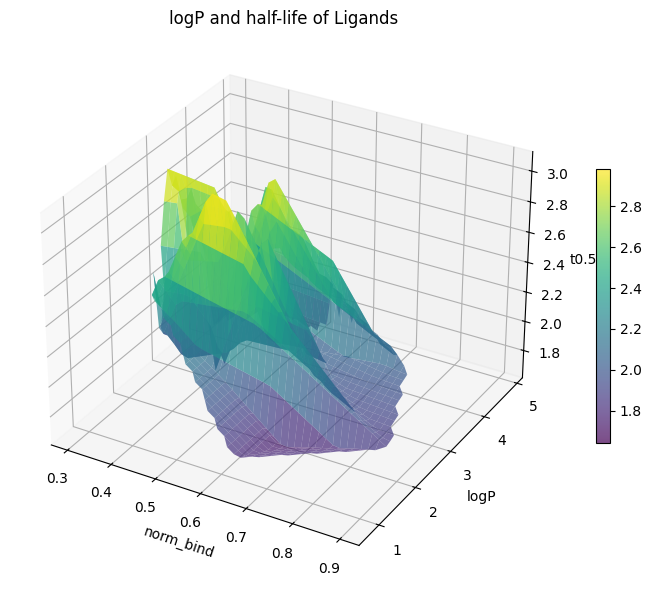

Surface plot saved as 3d_surface_plot.png (300 dpi)


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Set your file and column names
csv_file = 'bestLigs_ADME.csv'
x_column = 'norm_bind'   # e.g., 'X'
y_column = 'logP'   # e.g., 'Y'
z_column = 't0.5'   # e.g., 'Z'
id_column = 'pool_ID' 

df = pd.read_csv(csv_file)

df = df.sort_values([x_column, y_column])

##### 3D SURFACE PLOT #####

fig_surface = plt.figure(figsize=(8,6))
ax_surface = fig_surface.add_subplot(111, projection='3d')

xi = np.linspace(df[x_column].min(), df[x_column].max(), 40)
yi = np.linspace(df[y_column].min(), df[y_column].max(), 40)
Xi, Yi = np.meshgrid(xi, yi)
Zi = griddata((df[x_column], df[y_column]), df[z_column], (Xi, Yi), method='linear')

surf = ax_surface.plot_surface(Xi, Yi, Zi, cmap='viridis', edgecolor='none', alpha=0.7)
ax_surface.set_xlabel(x_column)
ax_surface.set_ylabel(y_column)
ax_surface.set_zlabel(z_column)
ax_surface.set_title("logP and half-life of Ligands")
fig_surface.colorbar(surf, ax=ax_surface, shrink=0.5)

plt.tight_layout()
fig_surface.savefig('3d_surface_plot.png', dpi=300)
plt.show()
print("Surface plot saved as 3d_surface_plot.png (300 dpi)")


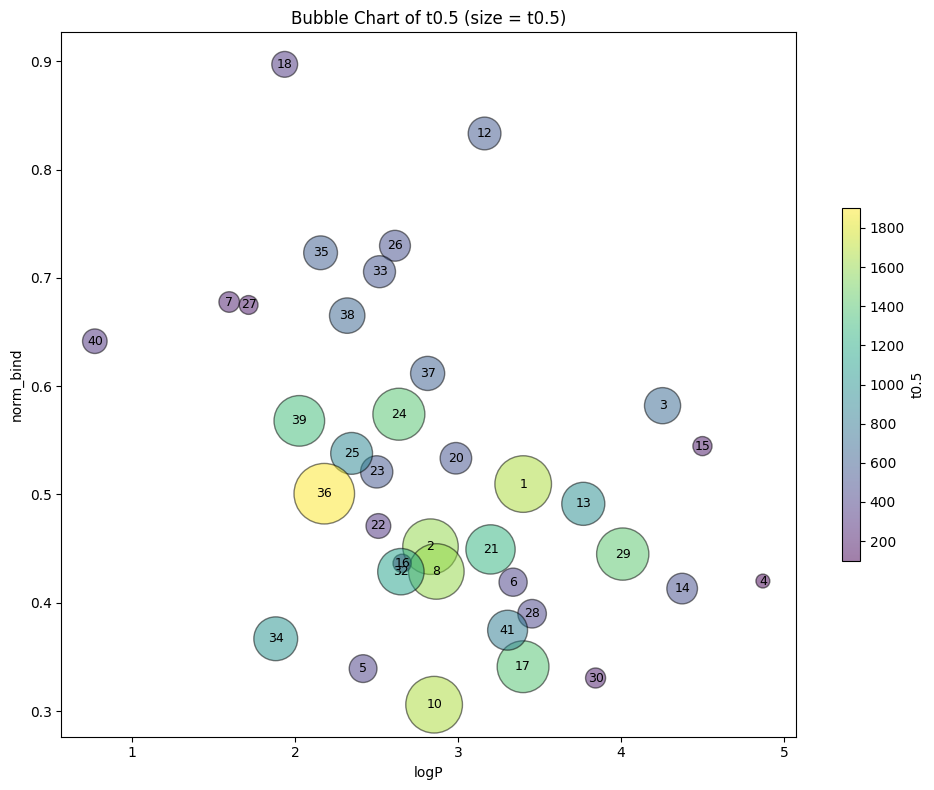

Saved bubble chart as bubble_chart.png (300 dpi)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Inputs: filename and columns to use
csv_file = 'bestLigs_ADME.csv'
x_column = 'logP'
y_column = 'norm_bind'
size_column = 't0.5'     # Bubble size encoding
label_column = 'pool_ID'      # ID column for labels

df = pd.read_csv(csv_file)

fig, ax = plt.subplots(figsize=(10,8))

# Normalize sizes for better visualization
sizes = (df[size_column] - df[size_column].min()) / (df[size_column].max() - df[size_column].min())
sizes = 100 + sizes * 1800  # Range: 100 to 1900 points

bubble = ax.scatter(df[x_column], df[y_column], s=sizes, alpha=0.5, c=sizes, cmap='viridis', edgecolor='k')

ax.set_xlabel(x_column)
ax.set_ylabel(y_column)
plt.title('Bubble Chart of {} (size = {})'.format(size_column, size_column))

# Add labels
for i in range(len(df)):
    ax.text(df[x_column].iloc[i], df[y_column].iloc[i], str(df[label_column].iloc[i]), fontsize=9, ha='center', va='center')

plt.colorbar(bubble, ax=ax, shrink=0.5, label=size_column)
plt.tight_layout()
plt.savefig('bubble_chart.png', dpi=300)
plt.show()
print("Saved bubble chart as bubble_chart.png (300 dpi)")


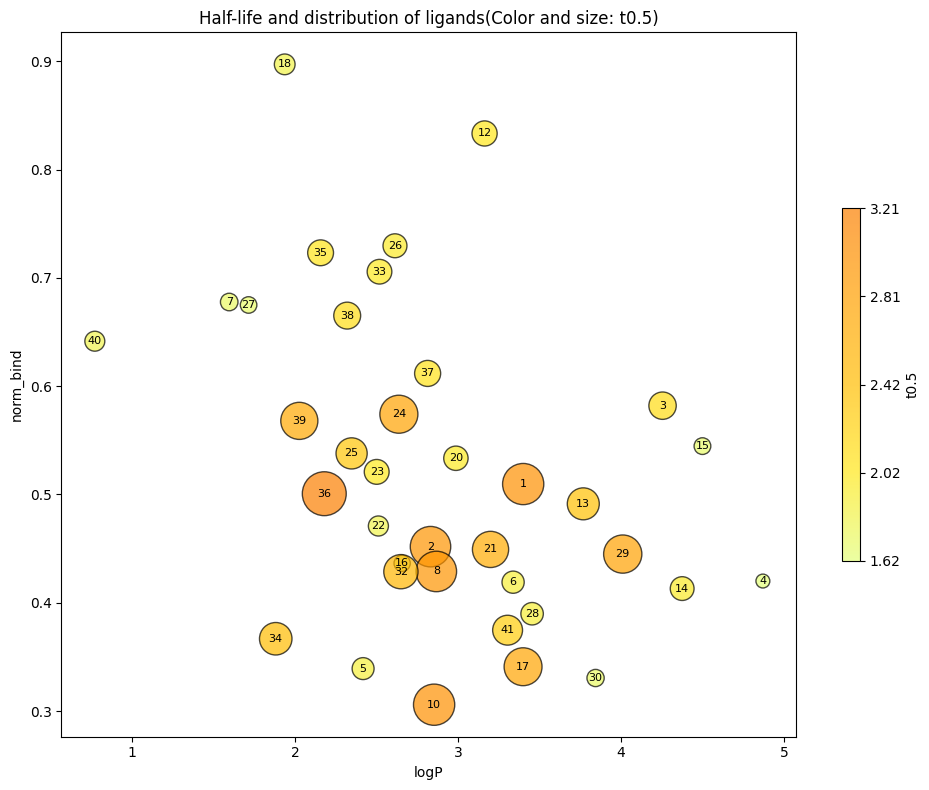

Bubble chart saved as bubble_chart.png (300 dpi)


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = 'bestLigs_ADME.csv'
x_column = 'logP'
y_column = 'norm_bind'
bubble_column = 't0.5'     # Bubble size encoding
label_column = 'pool_ID'      # ID column for labels

df = pd.read_csv(csv_file)

fig, ax = plt.subplots(figsize=(10,8))

# Bubble size normalization (just for visual clarity, NOT color!)
sizes = (df[bubble_column] - df[bubble_column].min()) / (df[bubble_column].max() - df[bubble_column].min()) * 900 + 100

# We use the original column for color
sc = ax.scatter(
    df[x_column], df[y_column],
    s=sizes,
    c=df[bubble_column],
    cmap='Wistia',
    alpha=0.7,
    edgecolor='black'
)

ax.set_xlabel(x_column)
ax.set_ylabel(y_column)
plt.title(f'Half-life and distribution of ligands(Color and size: {bubble_column})')

# Colorbar with original values as ticks
cbar = plt.colorbar(sc, ax=ax, shrink=0.5)
cbar.set_label(bubble_column)
# Optional: set colorbar ticks to meaningful (e.g. 5 evenly spaced)
import numpy as np
tick_locs = np.linspace(df[bubble_column].min(), df[bubble_column].max(), num=5)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels([f"{v:.2f}" for v in tick_locs])

# Add label text
for i in range(len(df)):
    ax.text(df[x_column].iat[i], df[y_column].iat[i], str(df[label_column].iat[i]), fontsize=8, ha='center', va='center')

plt.tight_layout()
plt.savefig('bubble_chart.png', dpi=300)
plt.show()
print('Bubble chart saved as bubble_chart.png (300 dpi)')


## DeepSA results

In [2]:
import pandas as pd

# Load your CSV file
filename = "Vinafrags_DeepSA_results.csv"  # change to your actual CSV filename
df = pd.read_csv(filename)

# Check column names to ensure the classification column exists
print("Columns in file:", df.columns.tolist())

# Assuming the column storing classification labels is named 'ES_class'
# It should contain labels like 'easy', 'moderate', 'hard'

summary = df['SA_class'].value_counts().sort_index()
print("\nCount Summary:")
print(summary)

# Compute percentage distribution
percent_summary = (summary / len(df) * 100).round(2)
print("\nPercentage Summary:")
print(percent_summary)

# Combine both count and percentage in one table
summary_df = pd.DataFrame({
    'Count': summary,
    'Percentage': percent_summary
})

print("\nSummary Table:")
print(summary_df)

# Optionally, save to a new CSV file for reporting
summary_df.to_csv('SA_class_summary.csv')

print("\nSummary exported to 'SA_class_summary.csv'")


Columns in file: ['MolecularID', 'LogP', 'MolecularWeight', 'smiles', 'MolWt', 'TPSA', 'Num_HBD', 'Num_HBA', 'Rotatable_Bonds', 'Conjugated_Bonds_Count', 'Ring_Count', 'Aromatic_Rings', 'Halogen_Count', 'Heavy_Atoms', 'Alcohol', 'Amine', 'Carboxyl', 'Carbonyl', 'Imine', 'Thiol', 'Sulfide', 'Halide', 'Amide', 'es', 'hs', 'HA_num', 'RingSystem_num', 'Ring_num', 'rule_of_five', 'SA_class']

Count Summary:
SA_class
easy        1076
hard        1885
moderate     880
Name: count, dtype: int64

Percentage Summary:
SA_class
easy        28.01
hard        49.08
moderate    22.91
Name: count, dtype: float64

Summary Table:
          Count  Percentage
SA_class                   
easy       1076       28.01
hard       1885       49.08
moderate    880       22.91

Summary exported to 'ES_class_summary.csv'
